<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/SeriesdeTiempo/X13_en_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mjuez/pytsdatasets/master/pytsdatasets/data/airpassengers.csv')

<Axes: title={'center': 'data'}, xlabel='Año', ylabel='data'>

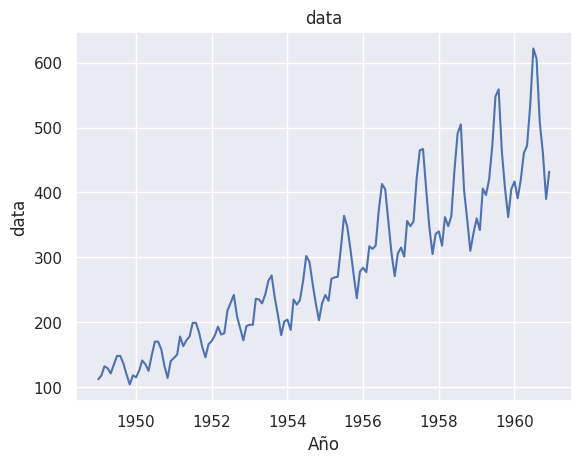

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
def graficar(variable):
    fig = sns.lineplot(x=data.index, y=variable)
    plt.title(variable.name)
    plt.xlabel("Año")
    plt.savefig('%s.png'%variable.name)
    return fig


data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)


graficar(data['data'])

In [3]:
X13AS_DIR='x13asall/'
X13AS_TARFILE='x13as_all-v1-1-b39.tar'
!mkdir -p $X13AS_DIR
!wget -P $X13AS_DIR -c 'https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/combined-archives/'+ X13AS_TARFILE
!tar -C $X13AS_DIR -xvf $X13AS_DIR/$X13AS_TARFILE
!mv '/content/x13asall/x13as' .

--2023-07-05 19:23:29--  https://www2.census.gov/software/x-13arima-seats/x13as/unix-linux/combined-archives/+
Resolving www2.census.gov (www2.census.gov)... 23.218.122.251, 2600:1408:7:191::208c, 2600:1408:7:1bd::208c
Connecting to www2.census.gov (www2.census.gov)|23.218.122.251|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-07-05 19:23:29 ERROR 404: Not Found.

--2023-07-05 19:23:29--  http://x13as_tarfile/
Resolving x13as_tarfile (x13as_tarfile)... failed: Name or service not known.
wget: unable to resolve host address ‘x13as_tarfile’
x13as
testairline.spc
docs/
docs/qrefX13ASunix.pdf
docs/docX13AS.pdf
tools/
tools/cnvx13as
tools/cnvx13as.html
tools/genhol
tools/genhol.html


In [4]:
import statsmodels.api as sm
decomposition=sm.tsa.x13_arima_analysis(data['data'],
                                        x12path='.',
                                        maxorder=(2, 1),
                                        maxdiff=(2, 1),
                                        diff=None,
                                        exog=None,
                                        log=None,
                                        outlier=True,
                                        trading=False,
                                        forecast_periods=None,
                                        retspec=False,
                                        speconly=False,
                                        start=None,
                                        freq=None,
                                        print_stdout=False,
                                        prefer_x13=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/x13.py:203: X13Warning: WARNING: At least one visually significant seasonal peak has been found
          in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [5]:
!wget 'https://raw.githubusercontent.com/LCaravaggio/AnalisisCuantitativoAvanzado/main/SeriesdeTiempo/plotting.py'
from plotting import plot_components_x13

--2023-07-05 19:23:30--  https://raw.githubusercontent.com/LCaravaggio/AnalisisCuantitativoAvanzado/main/SeriesdeTiempo/plotting.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3315 (3.2K) [text/plain]
Saving to: ‘plotting.py.4’

plotting.py.4       100%[===================>]   3.24K  --.-KB/s    in 0s      

2023-07-05 19:23:30 (51.6 MB/s) - ‘plotting.py.4’ saved [3315/3315]



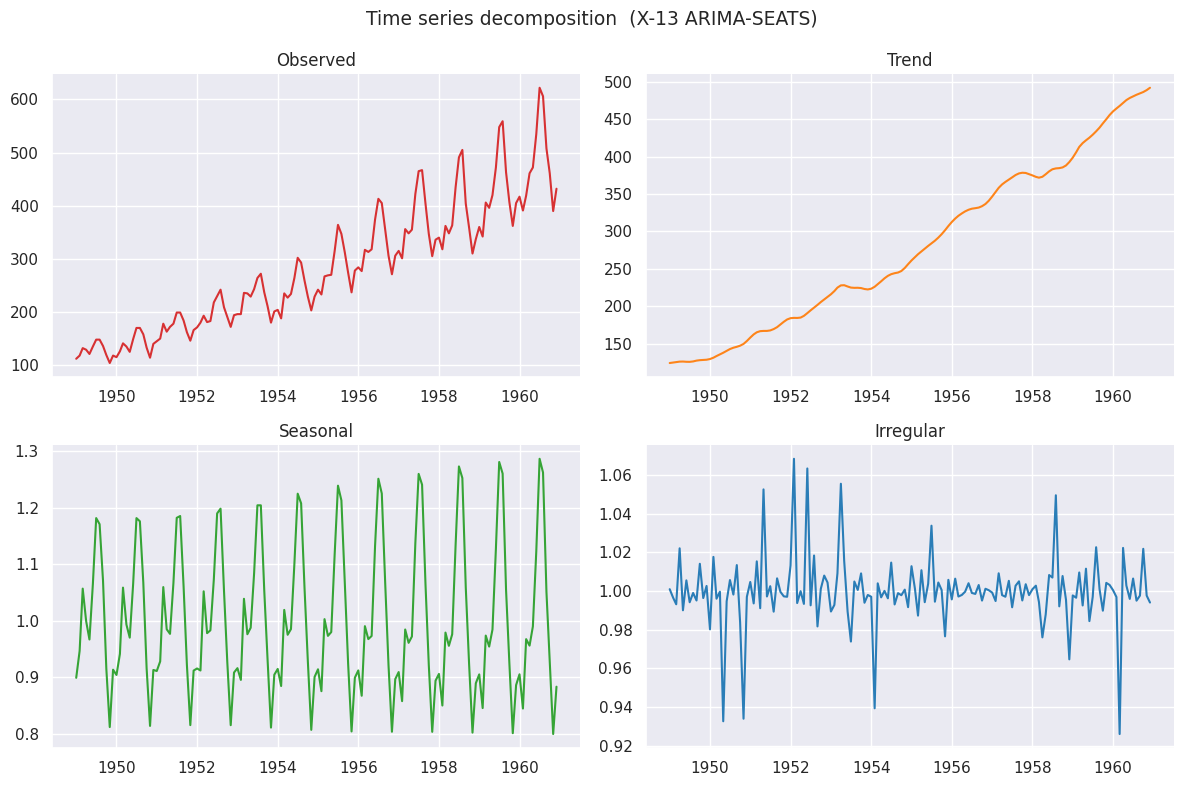

In [6]:
seasonal=decomposition.observed/decomposition.seasadj

plot_components_x13(decomposition)
plt.show()